In [1]:
import sklearn
sklearn.__version__

'0.23.2'

In [2]:
%matplotlib inline

In [3]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [4]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8811188811188811

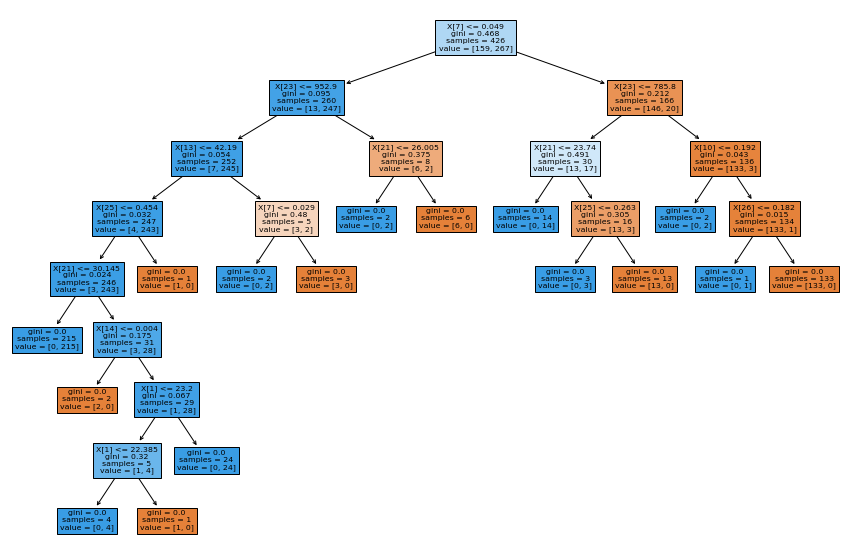

In [6]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True)
plt.show()

In [7]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [8]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [19]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf= DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-2].tree_.node_count, ccp_alphas[-2]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.03422474765119576


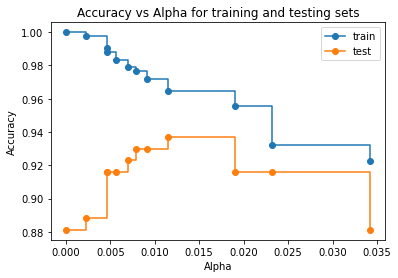

In [23]:
train_score = [clf.score(X_train, y_train) for clf in clfs[:-1] ]
test_score = [clf.score(X_test, y_test) for clf in clfs[:-1] ]

fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title("Accuracy vs Alpha for training and testing sets")
ax.plot(ccp_alphas[:-1],train_score, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas[:-1], test_score, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [30]:
ccp_alphas[(ccp_alphas>0.011) & (ccp_alphas<0.015)]

array([0.01144366])

In [60]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0114)#, min_samples_leaf=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0114, random_state=0)

In [61]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9300699300699301

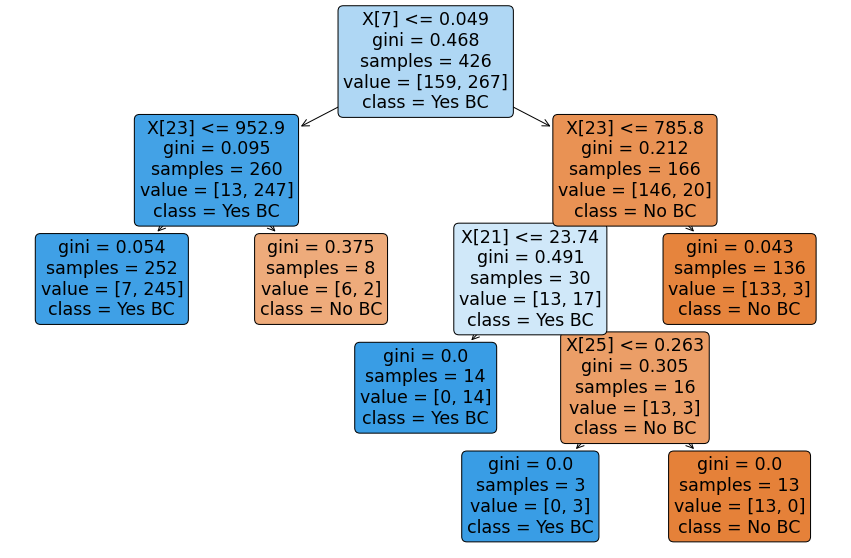

In [62]:
from sklearn import tree
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, filled=True, rounded=True, class_names=['No BC', 'Yes BC'])
plt.show()